# Accident Severity Prediction Model
      


## 1. Importing libraries

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from mpl_toolkits.basemap import Basemap
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Data and Cleaning
- We import three files to perform analysis on this data. This data is consist of three files that are accidents, casualities and vehicles of year 2021.

### Accident data

In [3]:
try:
    accident = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\accident-2021.csv')
except UnicodeDecodeError:
  
    accident = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\accident-2021.csv', encoding='utf-8')
    

### Casualty data

In [4]:
try:
    casualty = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\casualty-2021.csv')
except UnicodeDecodeError:
    casualty = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\casualty-2021.csv', encoding='utf-8')
    

### Vehicle data

In [5]:
try:
    vehicle = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\vehicle-2021.csv')
except UnicodeDecodeError:
    vehicle = pd.read_csv(r'C:\Users\dheer\Desktop\new data ph\vehicle-2021.csv', encoding='utf-8')

## 3. Dataset 

In [6]:
print("accident")
print("size=",accident.size)
print(accident.shape)
accident.head()

accident
size= 3639132
(101087, 36)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2021010287148,2021,10287148,521508.0,193079.0,-0.246102,51.623425,1,3,3,...,0,4,7,4,1,0,1,1,2,E01000263
1,2021010287149,2021,10287149,535379.0,180783.0,-0.050574,51.509767,1,2,2,...,5,4,1,1,0,0,1,1,2,E01004303
2,2021010287151,2021,10287151,529701.0,170398.0,-0.136152,51.417769,1,2,2,...,5,4,1,1,0,0,1,1,2,E01003146
3,2021010287155,2021,10287155,525312.0,178385.0,-0.196411,51.490536,1,1,1,...,4,4,1,1,0,0,1,1,2,E01002847
4,2021010287157,2021,10287157,512144.0,171526.0,-0.388169,51.431649,1,3,4,...,0,4,1,1,0,0,1,1,2,E01002608


In [7]:
print("vehicle")
print("size=",vehicle.size)
print(vehicle.shape)
vehicle.head()

vehicle
size= 5220404
(186443, 28)


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2021010287148,2021,10287148,1,9,0,17,1,5,0,...,1,19,4,999,1,3,VOLKSWAGEN GOLF,10,1,E01023551
1,2021010287148,2021,10287148,2,9,0,2,0,0,0,...,3,-1,-1,1499,1,2,BMW 1 SERIES,-1,-1,-1
2,2021010287148,2021,10287148,3,9,0,2,0,0,0,...,3,-1,-1,-1,3,1,SMART FORTWO,-1,-1,-1
3,2021010287149,2021,10287149,1,9,0,18,3,7,0,...,1,32,6,2967,2,11,AUDI Q7,-1,-1,-1
4,2021010287149,2021,10287149,2,9,0,18,5,1,0,...,1,21,5,1598,1,11,VAUXHALL ASTRA,3,1,E01004202


In [8]:
print("casualty")
print("size=",casualty.size)
print(casualty.shape)
casualty.head()

casualty
size= 2435971
(128209, 19)


,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2021010287148,2021,10287148,1,1,1,1,19,4,3,0,0,0,0,0,9,1,10,E01023551
1,2021010287149,2021,10287149,1,1,2,1,25,5,3,0,0,1,0,0,9,1,5,E01003955
2,2021010287149,2021,10287149,2,2,1,1,21,5,3,0,0,0,0,0,9,1,3,E01004202
3,2021010287149,2021,10287149,2,3,2,1,17,4,2,0,0,1,0,0,9,1,2,E01004295
4,2021010287151,2021,10287151,1,1,1,1,27,6,3,0,0,0,0,0,9,1,2,E01002056


## 4. Joining Dataset

In [9]:
accivehi=pd.merge(accident, vehicle, on='accident_index')
print(accivehi.shape)
accivehi.head()
accivehi = accivehi.fillna(-1)

(157146, 63)


In [10]:
#combining two columns
accivehi['date_time'] = accivehi['date'] +' '+ accivehi['time']
accivehi['date_time'] = pd.to_datetime(accivehi.date_time)
accivehi.drop(['date','time'],axis =1 , inplace=True)


## 5. Data Visulization

Text(0.5, 0, '0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday')

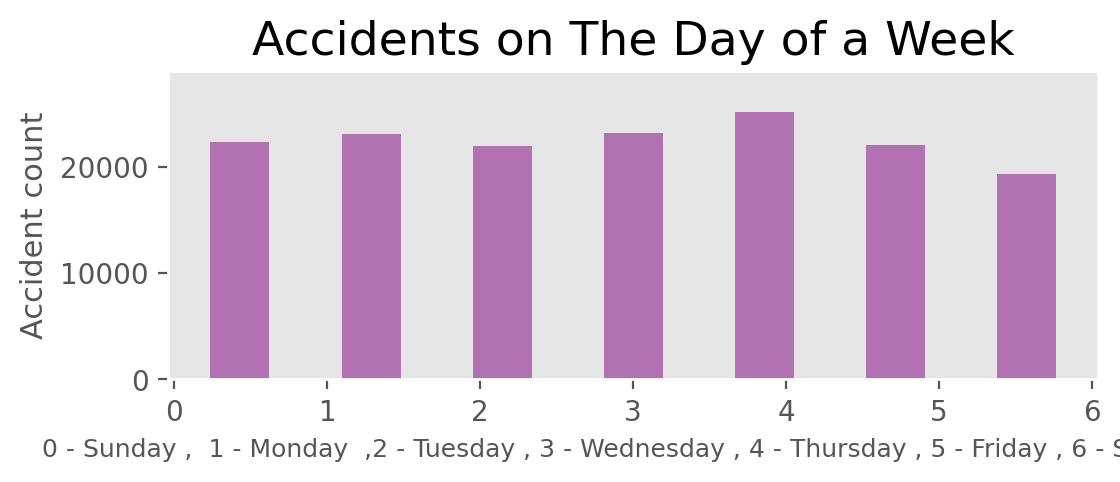

In [11]:
plt.figure(figsize=(6,2))
accivehi.date_time.dt.dayofweek.hist(bins=7,rwidth=0.45,alpha=0.5, color= 'purple')
plt.title('Accidents on The Day of a Week' , fontsize= 17)
plt.grid(False)
plt.ylim(0, 29000)
plt.ylabel('Accident count' , fontsize = 11)
plt.xlabel('0 - Sunday ,  1 - Monday  ,2 - Tuesday , 3 - Wednesday , 4 - Thursday , 5 - Friday , 6 - Saturday' , fontsize = 9)

Text(0, 0.5, 'Accident count')

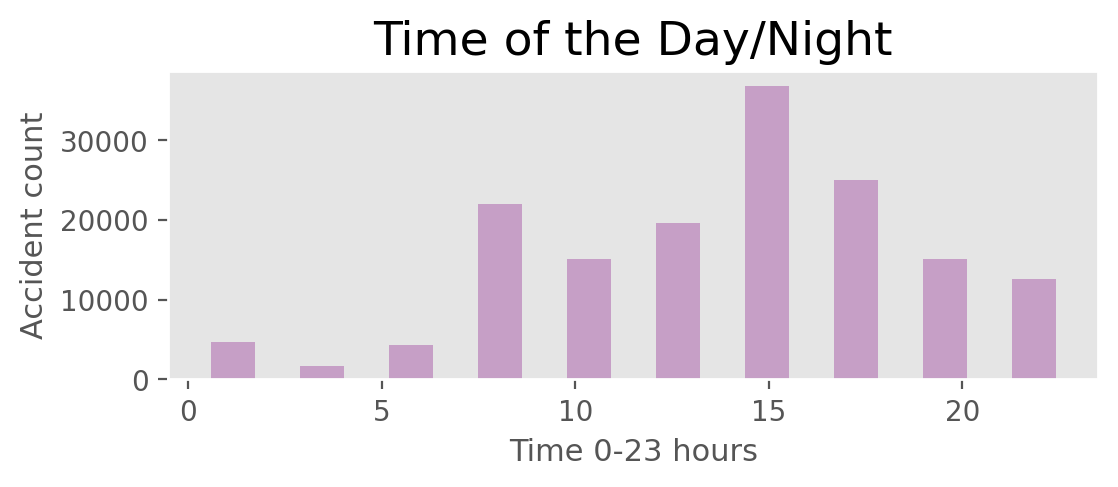

In [12]:
plt.figure(figsize=(6,2))
accivehi.date_time.dt.hour.hist(alpha=0.3,rwidth=0.5,color= 'purple')
plt.title('Time of the Day/Night',fontsize= 17)
plt.grid(False)
plt.xlabel('Time 0-23 hours' , fontsize = 11)
plt.ylabel('Accident count' , fontsize = 11)

Text(0.5, 0, 'Age of Drivers')

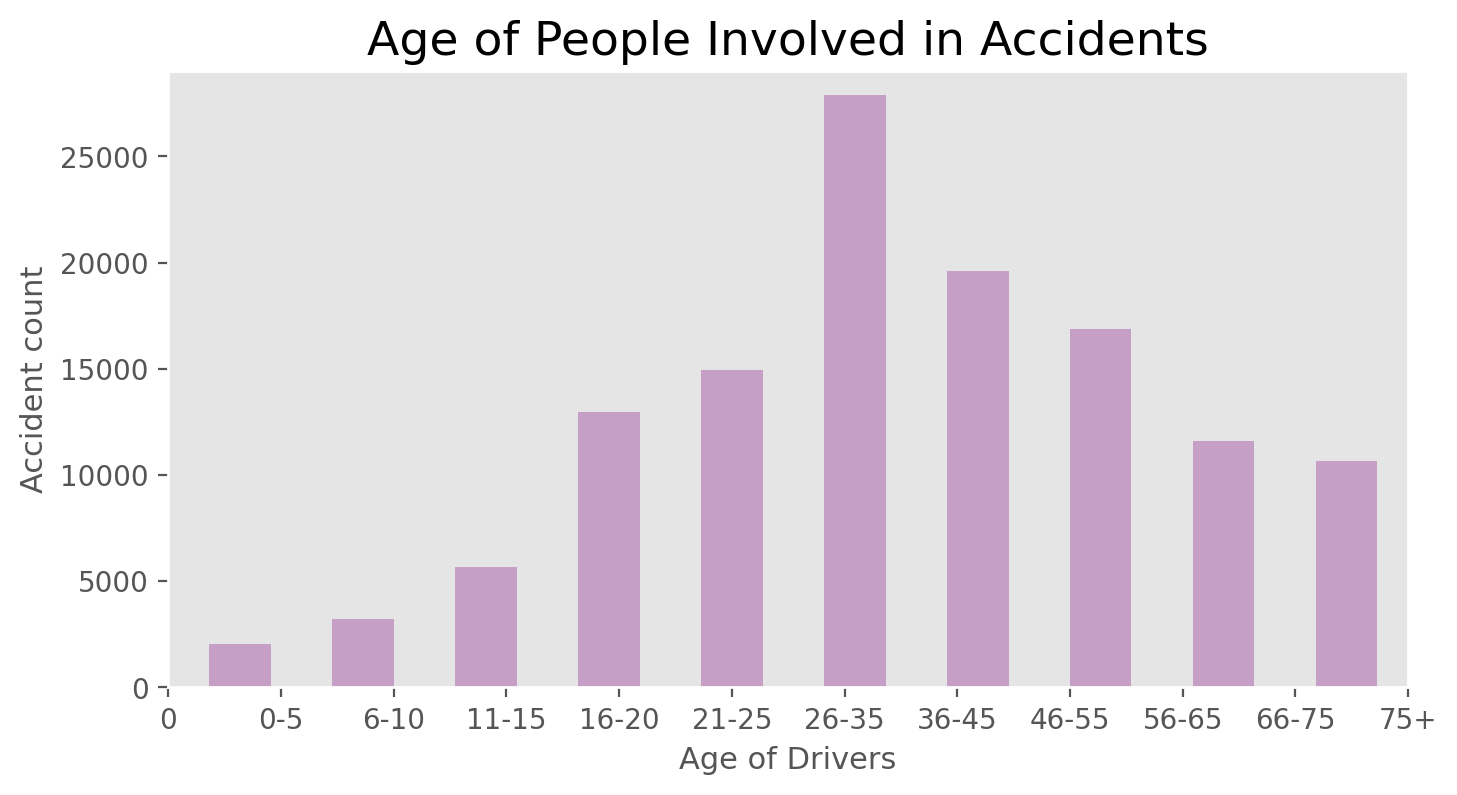

In [13]:
objects = ['0','0-5','6-10','11-15','16-20','21-25','26-35','36-45','46-55','56-65','66-75','75+']

plt.figure(figsize=(8,4))
casualty.age_band_of_casualty.hist(bins = 11,alpha=0.3,rwidth=0.5,color= 'purple',)
plt.title('Age of People Involved in Accidents', fontsize = 17)
plt.grid(False)
y_pos = np.arange(len(objects))
plt.ylim(0, 29000)
plt.xlim(0, 10)
plt.xticks(y_pos , objects)
plt.ylabel('Accident count' , fontsize = 11)
plt.xlabel('Age of Drivers', fontsize = 11)

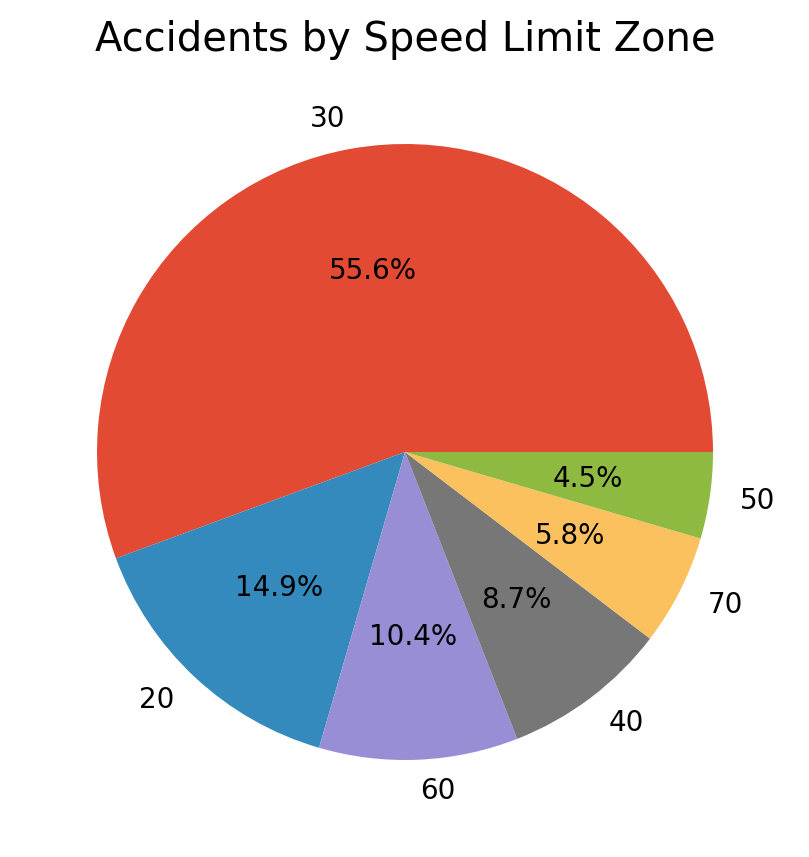

In [14]:

speed_zone_accidents = accivehi.loc[accivehi['speed_limit'].isin([20, 30, 40, 50, 60, 70])]
speed_counts = speed_zone_accidents['speed_limit'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(12, 5))
ax.pie(speed_counts.values, labels=speed_counts.index.map(str), autopct='%1.1f%%')
ax.set_title('Accidents by Speed Limit Zone')
plt.show()


<Axes: >

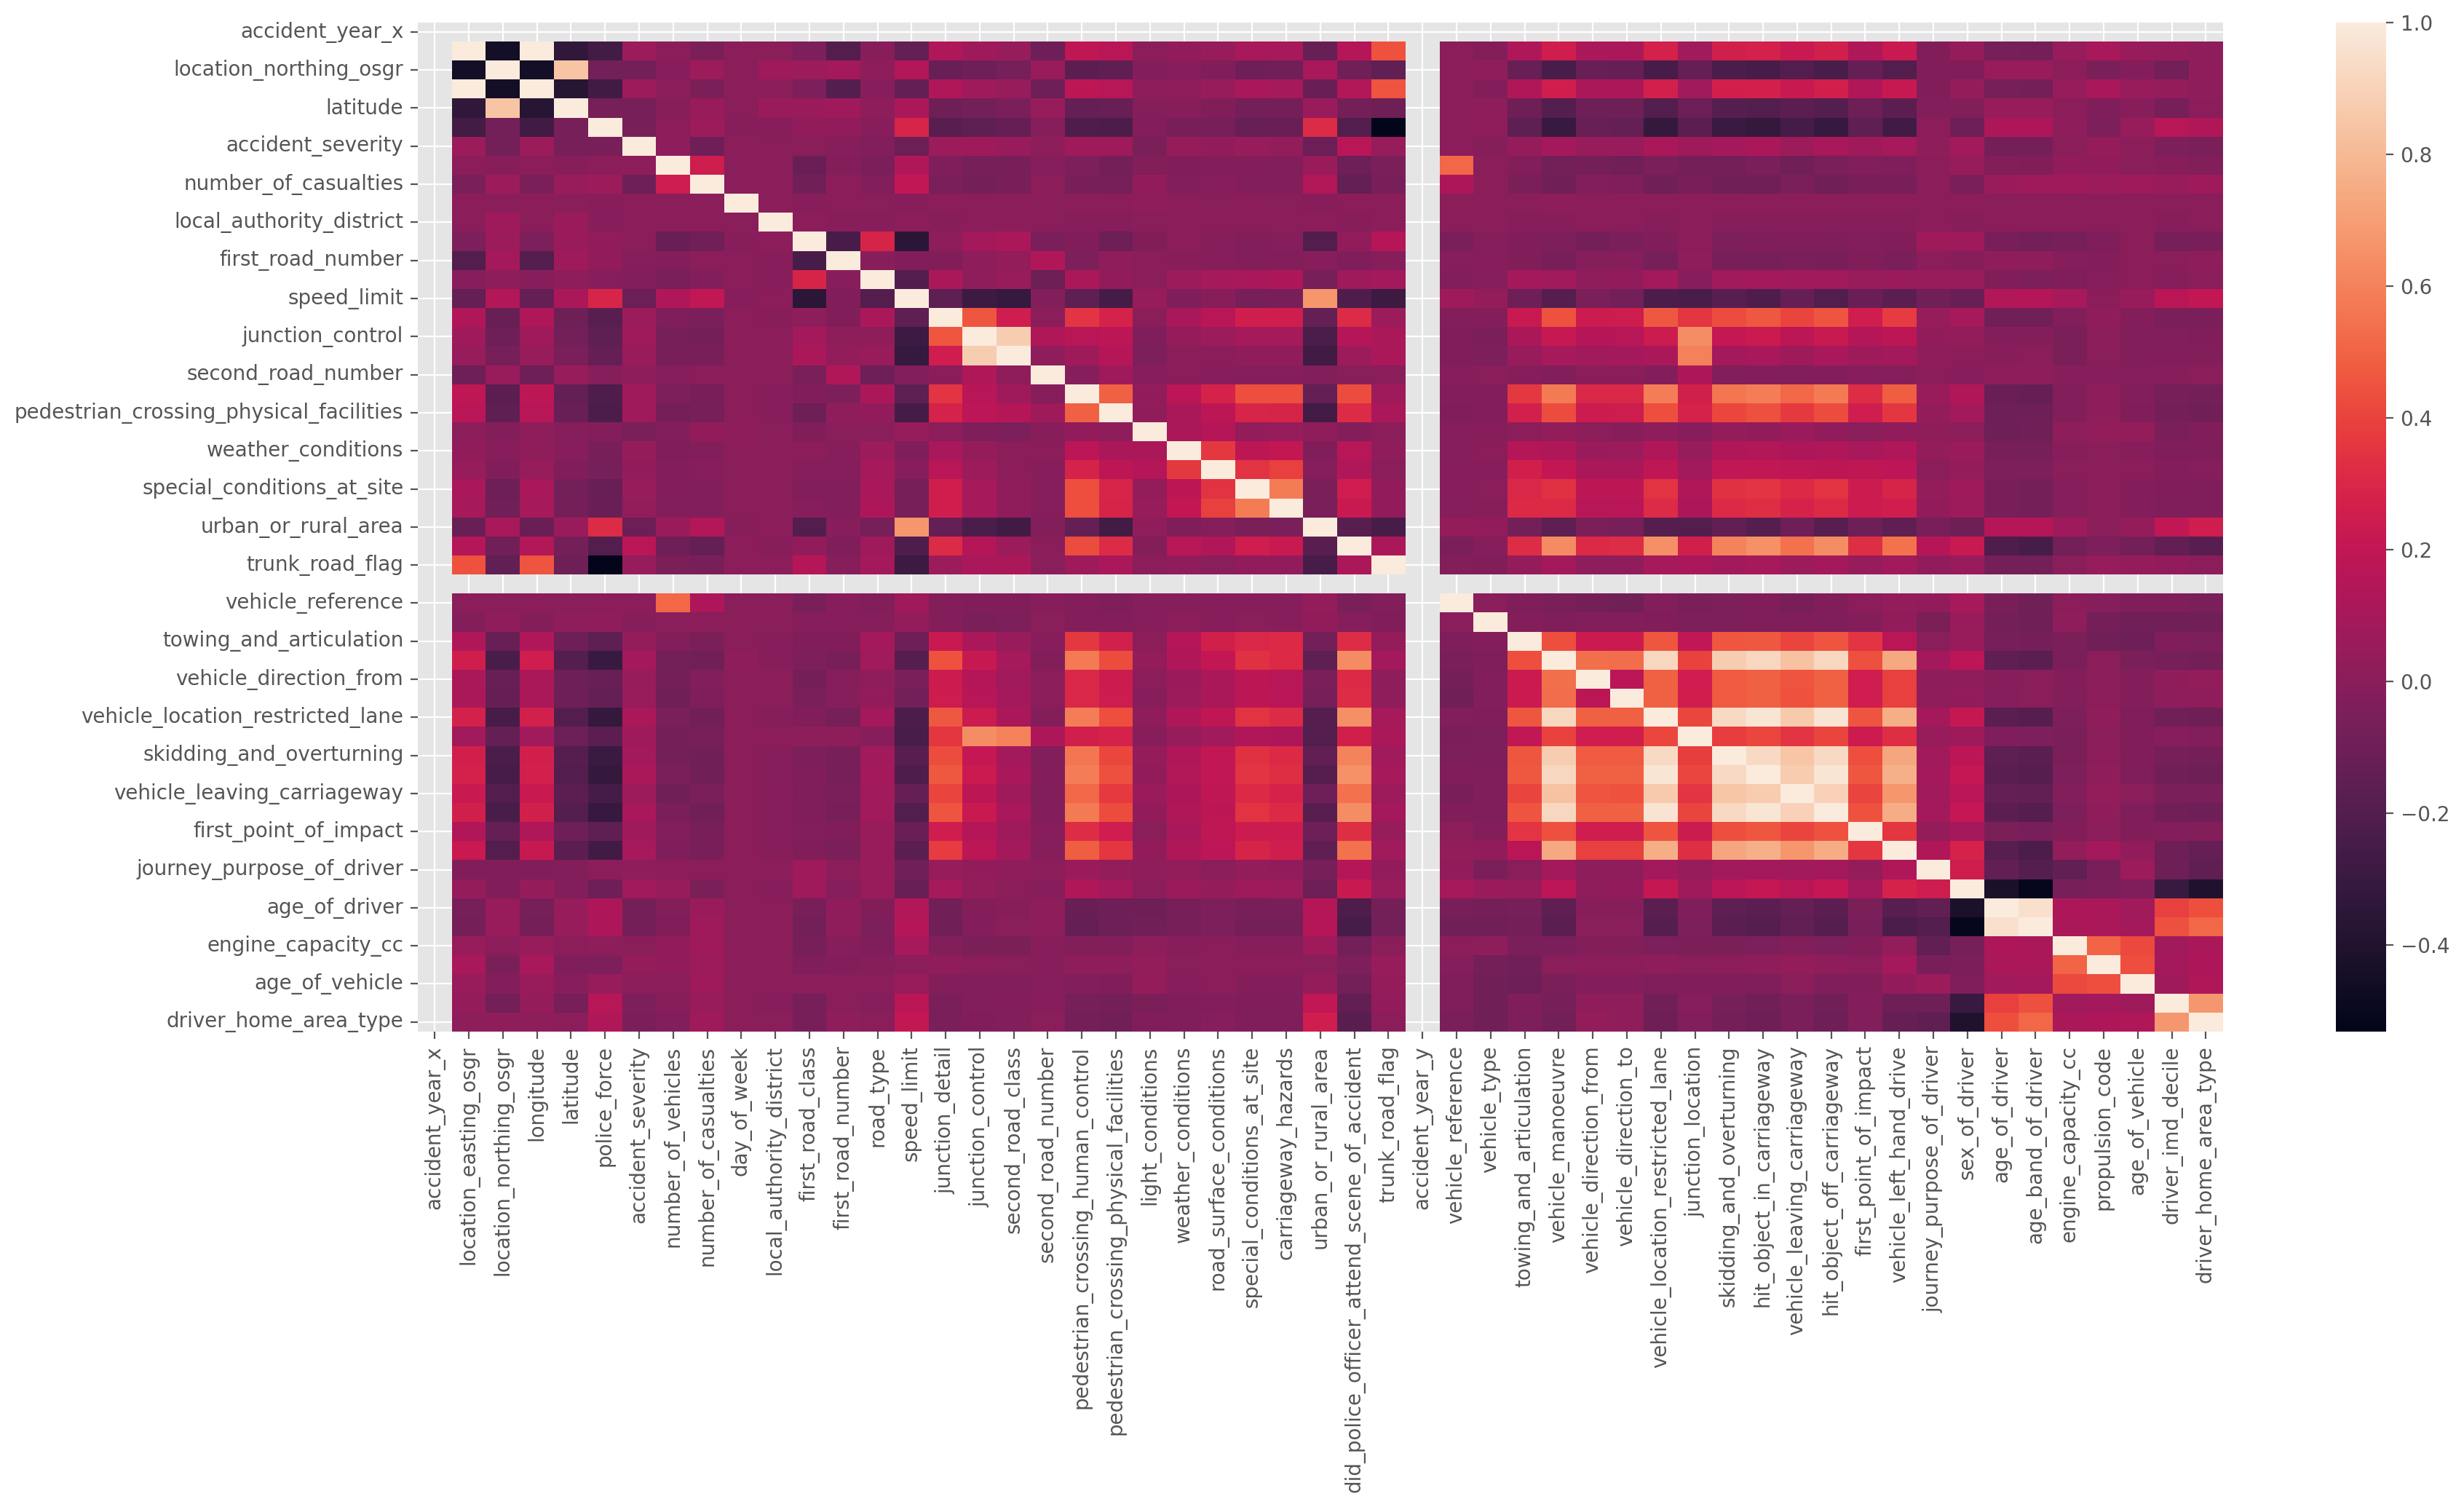

In [15]:
corr =  accivehi.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr)

# 6. Machine Learning

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
print("done")

done


### Normalizing the Data
There are few columns that we will standarize, so it would not effect negatively on our machine learning algorithms. Age of driver is from 18 to 88 in the dataset and we can normalize it. Also, the age of vehicle is also from 0 to 100 and it can skew the performance of your machine learning algorithm and we will normalize this predictor too.

In [20]:
accivehi.dropna(subset=['age_of_vehicle'], inplace=True)

done


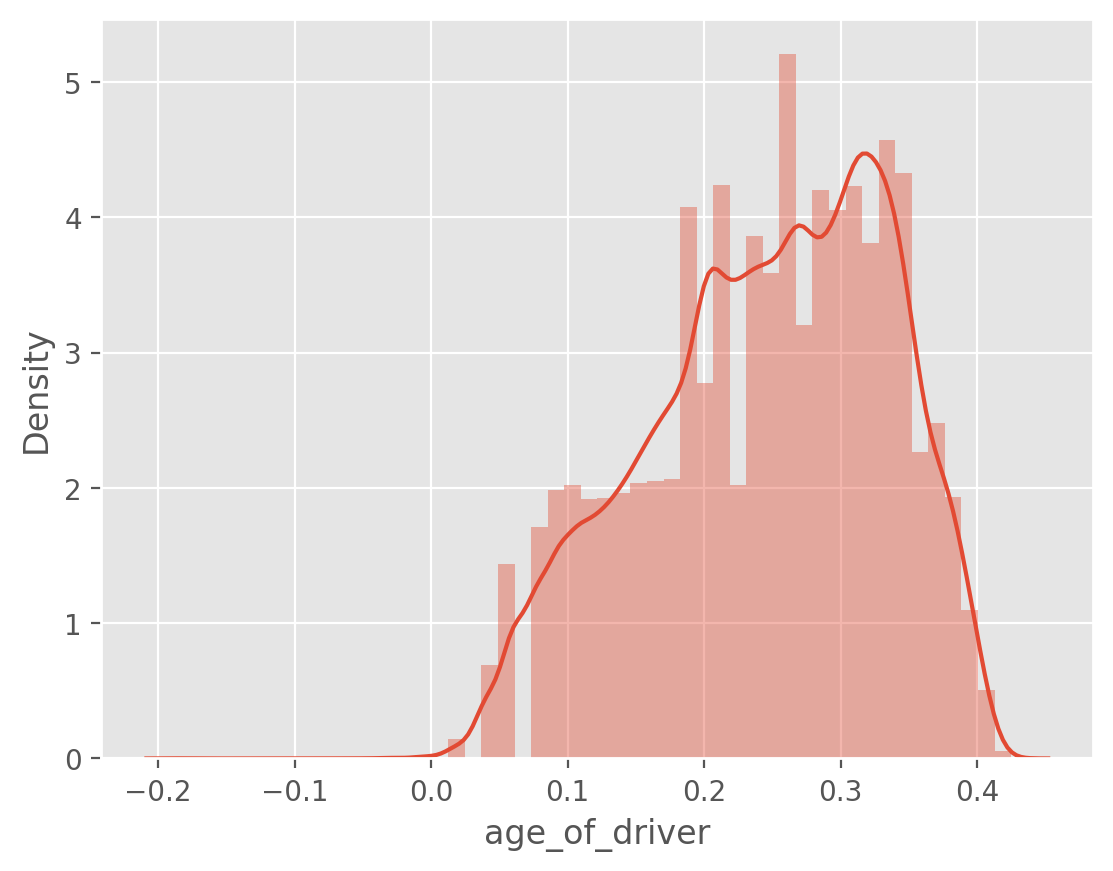

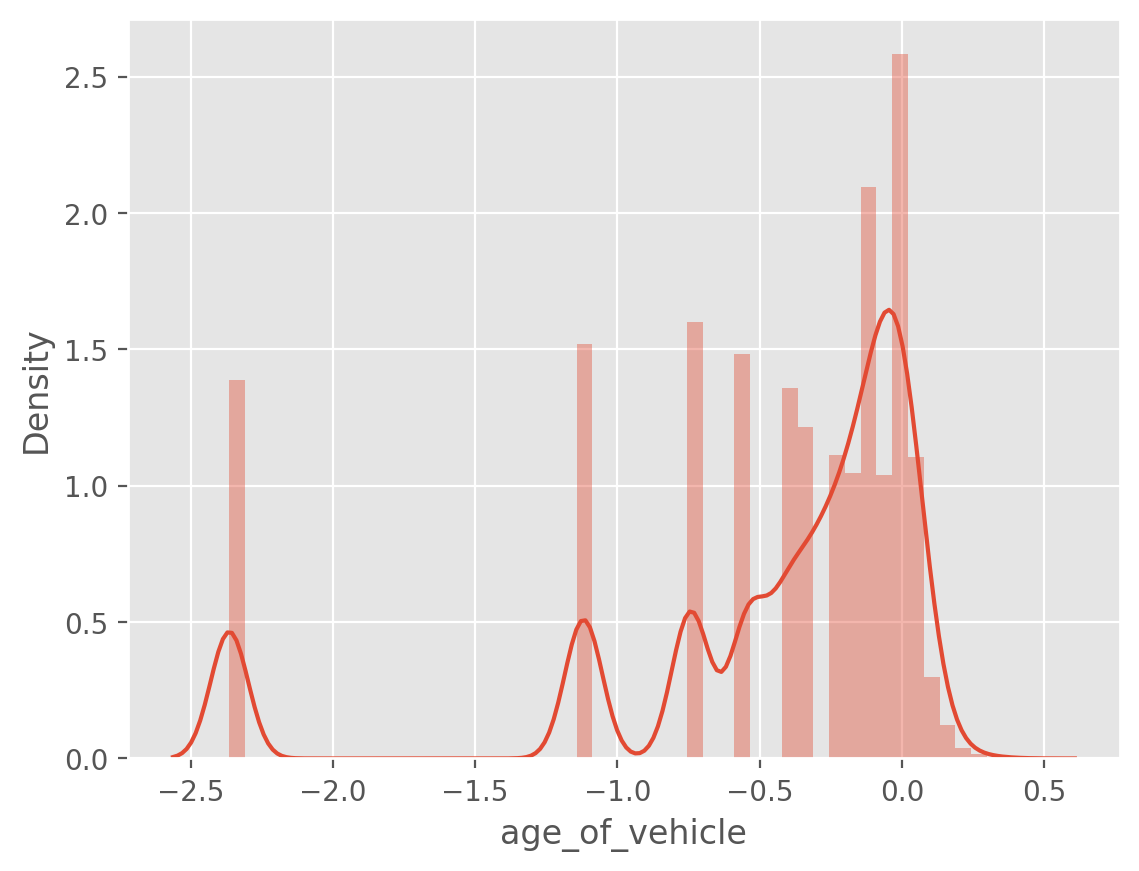

<Figure size 640x480 with 0 Axes>

In [21]:

accivehi['age_of_driver'] = np.log(accivehi['age_of_driver'])
accivehi['age_of_vehicle'] = np.log(accivehi['age_of_vehicle'])
sns.distplot(accivehi['age_of_driver']);
fig = plt.figure()
sns.distplot(accivehi['age_of_vehicle']);
fig = plt.figure()
print("done")

### Spliting the data into training data and test data

In [22]:
accident_ml = accivehi.drop('accident_severity' ,axis=1)
accident_ml = accident_ml[['did_police_officer_attend_scene_of_accident' , 'age_of_driver' ,'vehicle_type', 'age_of_vehicle','engine_capacity_cc','day_of_week' , 'weather_conditions' , 'road_surface_conditions'
                          , 'light_conditions', 'sex_of_driver' ,'speed_limit']]

accident_ml.head()

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, accivehi['accident_severity'].values,test_size=0.20, random_state=99)
print("done")

done


In [23]:
y_train[100:200]
print(np.argmin(y_train))
print(y_train[60])
print(X_train[60])

20
3
[ 1.00000000e+00  2.24554260e-01  9.00000000e+00 -3.00244759e-02
  1.59600000e+03  4.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  5.00000000e+01]


In [24]:
accivehi.to_csv('accivehi.csv', index=False)

In [25]:
X_train[0]

array([ 1.00000000e+00,  3.78134984e-01,  9.00000000e+00, -5.98150439e-02,
        1.59800000e+03,  7.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  6.00000000e+01])

##  Random Forest

In [26]:
from sklearn.impute import SimpleImputer

# Replace missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train and evaluate the random forest classifier
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train_imputed, y_train)
Y_pred = random_forest.predict(X_test_imputed)
acc_random_forest1 = round(random_forest.score(X_test_imputed, y_test) * 100, 2)


In [27]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)



Accuracy 78.77
              precision    recall  f1-score   support

           1   0.214286  0.010239  0.019544       293
           2   0.320707  0.069761  0.114595      3641
           3   0.807633  0.967636  0.880424     15789

    accuracy                       0.787659     19723
   macro avg   0.447542  0.349212  0.338188     19723
weighted avg   0.708929  0.787659  0.726258     19723



Predicted,1,2,3,All
Actual,,,,
1,3,34,256,293
2,4,254,3383,3641
3,7,504,15278,15789
All,14,792,18917,19723


### Saving Model

In [ ]:
# Save the trained model to a file
import joblib
filename = 'RFfinal21_model.joblib'
joblib.dump(random_forest, filename)

print(f"Model saved to {filename}")

Model saved to RFfinal21_model.joblib


In [ ]:
# Load the saved model from file
filename = 'RFfinal21_model.joblib'
loaded_model = joblib.load(filename)
result=loaded_model.score(X_test_imputed, y_test)
print(result)
loaded_model
print("loaded model")

0.7868985448461188
loaded model


In [ ]:
Y_pred = random_forest.predict(X_test[11].reshape(1, -1))
print(Y_pred)

[3]


In [ ]:
X_train[0]

array([ 1.00000000e+00,  3.78134984e-01,  9.00000000e+00, -5.98150439e-02,
        1.59800000e+03,  7.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  6.00000000e+01])

In [ ]:
X= [1.00000000e+00,3.17805383e+00 , 9.00000000e+00 , 2.70805020e+00,1.67900000e+03,6.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,1.00000000e+00,3.00000000e+01]
# X= [3.5,11,1.6,8300.0,5,1,1,1,1,30]
X= np.array([  1.        ,   3.73766962,   3.        ,   0.69314718,
       125.        ,   4.        ,   1.        ,   1.        ,
         1.        ,   1.        ,  30.        ])
# Y = loaded_model.predict(X_train[0].reshape(1, -1))
Y = loaded_model.predict(X.reshape(1, -1))
print(Y) #printed the 

[3]


## Logistic Regression 

In [28]:
lr = LogisticRegression()
# # Fit the model on the trainng data.
lr.fit(X_train_imputed, y_train)
y_pred = lr.predict(X_test_imputed)
sk_report = classification_report(
     digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 80.05
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       293
           2   0.000000  0.000000  0.000000      3641
           3   0.800537  1.000000  0.889221     15789

    accuracy                       0.800537     19723
   macro avg   0.266846  0.333333  0.296407     19723
weighted avg   0.640860  0.800537  0.711854     19723



Predicted,3,All
Actual,,
1,293,293
2,3641,3641
3,15789,15789
All,19723,19723


## Decision Tree

In [29]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_imputed, y_train)
Y_pred = decision_tree.predict(X_test_imputed)
acc_decision_tree1 = round(decision_tree.score(X_test_imputed, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
#Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 67.88
              precision    recall  f1-score   support

           1   0.046296  0.051195  0.048622       293
           2   0.214196  0.234551  0.223912      3641
           3   0.812224  0.792830  0.802410     15789

    accuracy                       0.678751     19723
   macro avg   0.357572  0.359525  0.358315     19723
weighted avg   0.690446  0.678751  0.684417     19723



Predicted,1,2,3,All
Actual,,,,
1,15,91,187,293
2,80,854,2707,3641
3,229,3042,12518,15789
All,324,3987,15412,19723


As we can see that Logistic regression did pretty well in terms of number. If we look carefully at the confusion matrix. We can definitely tell that Decision tree algorithm did much better. It predicted more fatal and serious injuries as true positive. The accuracy score is lower compare to another algorithm because other algorithm predicted majority of slightly accidents and those numbers are really high overall in the dataset. Confusion matrix helps us to understand what algorithm actually worked better in terms of looking at all different prediction of each class.

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boost = GradientBoostingClassifier()
gradient_boost = GradientBoostingClassifier()
gradient_boost.fit(X_train_imputed, y_train)
Y_pred = gradient_boost.predict(X_test_imputed)
acc_gradient_boost = round(gradient_boost.score(X_test_imputed, y_test) * 100, 2)
sk_report = classification_report(
     digits=6,
     y_true=y_test, 
     y_pred=Y_pred)
print("Accuracy", acc_gradient_boost)
print(sk_report)
#Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)


Accuracy 80.1
              precision    recall  f1-score   support

           1   0.000000  0.000000  0.000000       293
           2   0.472081  0.025542  0.048463      3641
           3   0.804487  0.994743  0.889556     15789

    accuracy                       0.801044     19723
   macro avg   0.425523  0.340095  0.312673     19723
weighted avg   0.731171  0.801044  0.721069     19723



Predicted,1,2,3,All
Actual,,,,
1,0,24,269,293
2,0,93,3548,3641
3,3,80,15706,15789
All,3,197,19523,19723


## Feature importance
We can use Sklearn's random forest library to find out the most important features. We will be plotting in  ascending order so we know what features are most important to predict the accident severity.

<Axes: >

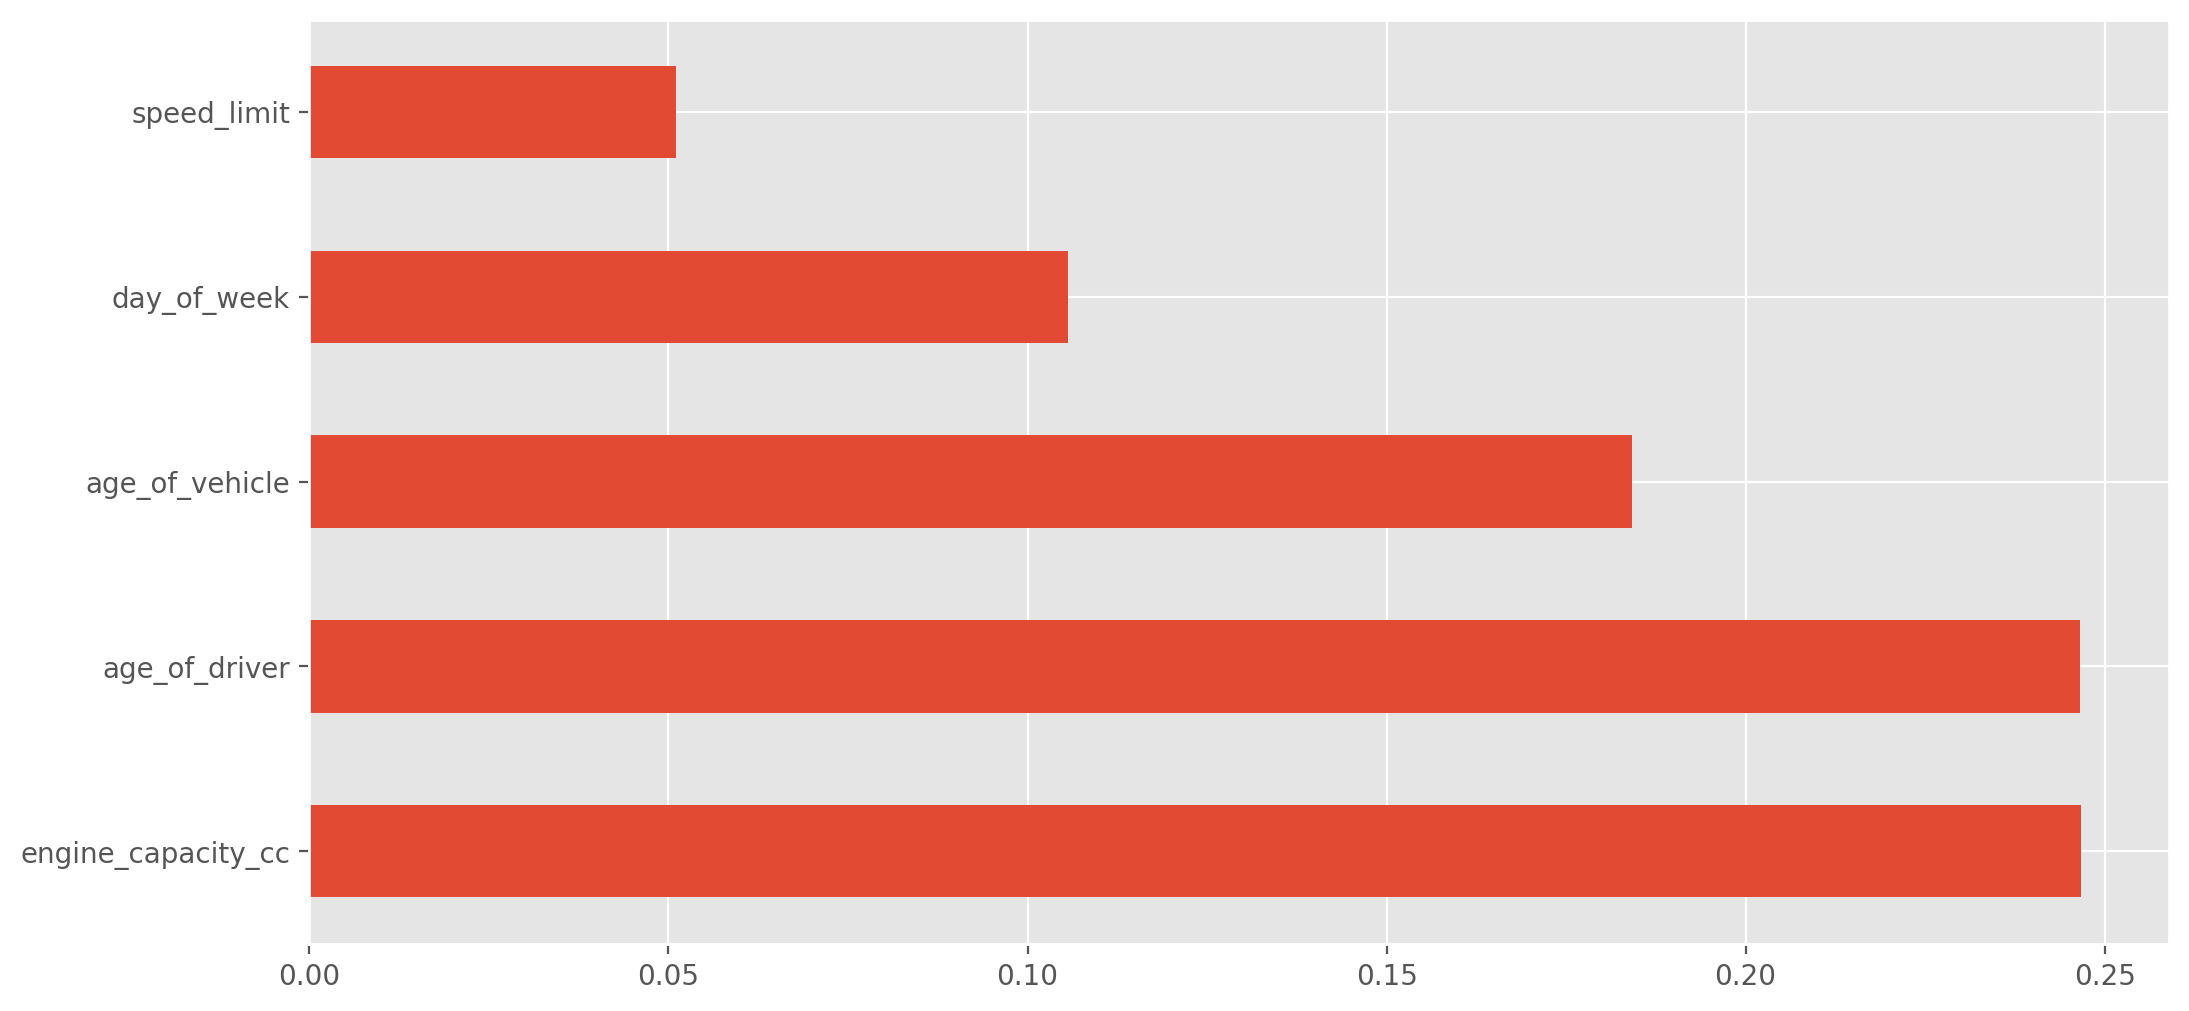

In [ ]:
plt.figure(figsize=(12,6))
feat_importances = pd.Series(random_forest.feature_importances_, index=accident_ml.columns)
feat_importances.nlargest(5).plot(kind='barh')